In [52]:
import numpy
import scipy.special
#определим класс нейронной сети
class neuralNetwork:
    #инициализация
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #количество узлов
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        #коэффициент обучения
        self.lr=learningrate
         #матрицы весов между входом и скрытым и между скрытым и выходом
        self.wih=numpy.random.normal(0.0,pow(self.inodes,-0,5),(self.hnodes, self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.hnodes,-0,5),(self.onodes, self.hnodes))
        #определим функцию активации как сигмоиду
        self.activation_function=lambda x: scipy.special.expit(x)
        
        pass
    #тренировка сети
    def train(self,inputs_list, targets_list):
        #преобразуем список входных значений в двумерный массив
        inputs=numpy.array(inputs_list, ndmin=2).T
        targets=numpy.array(targets_list, ndmin=2).T
        #входящие сигналы для скрытого слоя
        hidden_inputs=numpy.dot(self.wih, inputs)
        #исхоящие сигналы для скрытого слоя
        hidden_outputs=self.activation_function(hidden_inputs)
        #входящие сигналы для выходного слоя
        final_inputs=numpy.dot(self.who,hidden_outputs)
        #исходящие сигналы для выходного слоя
        final_outputs=self.activation_function(final_inputs)
        
        #ошибка выходного слоя=целевое значение -фактическое значение
        output_errors=targets-final_outputs
        #ошибка скрытого слоя = вес^т*ошибки
        hidden_errors=numpy.dot(self.who.T, output_errors)
        #обновим весовые коэффициенты связей между скрытым и выходным слоями 
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        pass
    #опрос сети
    def query(self, inputs_list):
        #преобразуем список входных значений в двумерный массив
        inputs=numpy.array(inputs_list, ndmin=2).T
        
        #входящие сигналы для скрытого слоя
        hidden_inputs=numpy.dot(self.wih, inputs)
        #исхоящие сигналы для скрытого слоя
        hidden_outputs=self.activation_function(hidden_inputs)
        #входящие сигналы для выходного слоя
        final_inputs=numpy.dot(self.who,hidden_outputs)
        #исходящие сигналы для выходного слоя
        final_outputs=self.activation_function(final_inputs)
        return final_outputs
    
        
        pass
   

In [53]:
#создадим экземпляр сети с параметрами 784 100 10 0,3
i_n=784
h_n=200
o_n=10
l_r=0.2
n=neuralNetwork(i_n, h_n, o_n, l_r)

In [54]:
#загрузим в список тестовый набор данных
training_data_file=open('/Users/igorvozhga/desktop/neurnet/mnist_train.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [55]:
#тренировка сети
#для каждой записи в списке
epochs=5
for e in range(epochs):
    for record in training_data_list:
        #получим список значений в массив
        all_values=record.split(',')
        inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
        #создадим телевые значения по первым маркерам
        targets=numpy.zeros(o_n)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        pass
print("1")


1


In [56]:
test_data_file=open('/Users/igorvozhga/desktop/neurnet/mnist_test.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close()

Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  4
Right answer is:  4
Network answer is:  1
Right answer is:  1
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  5
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  6
Right answer is:  6
Network answer is:  5
Right answer

Network answer is:  1
Right answer is:  1
Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer

Network answer is:  5
Right answer is:  5
Network answer is:  4
Right answer is:  4
Network answer is:  4
Right answer is:  4
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  8
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  4
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  5
Network answer is:  7
Right answer is:  7
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  4
Right answer

Network answer is:  6
Right answer is:  2
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  6
Right answer is:  6
Network answer is:  8
Right answer is:  2
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer

Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  5
Network answer is:  2
Right answer is:  2
Network answer is:  2
Right answer is:  2
Network answer is:  5
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  9
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  3
Network answer is:  2
Right answer

Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  5
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  3
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  6
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  8
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer

Network answer is:  1
Right answer is:  7
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  4
Right answer is:  4
Network answer is:  3
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  5
Right answer is:  5
Network answer is:  2
Right answer is:  2
Network answer is:  2
Right answer is:  2
Network answer is:  6
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  2
Right answer is:  2
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  2
Right answer is:  2
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  2
Right answer

Network answer is:  4
Right answer is:  4
Network answer is:  3
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  4
Right answer

Network answer is:  3
Right answer is:  3
Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  0
Right answer is:  0
Network answer is:  4
Right answer is:  4
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  9
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  7
Right answer

Network answer is:  2
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  7
Network answer is:  3
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  3
Right answer is:  3
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  5
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer

Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  5
Right answer is:  5
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  2
Right answer is:  2
Network answer is:  7
Right answer is:  7
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  5
Right answer is:  5
Network answer is:  2
Right answer is:  2
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer

Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  9
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  5
Right answer is:  5
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  3
Right answer is:  3
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  5
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer

Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  3
Network answer is:  0
Right answer is:  0
Network answer is:  0
Right answer is:  0
Network answer is:  4
Right answer is:  4
Network answer is:  3
Right answer is:  3
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  5
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  2
Right answer is:  2
Network answer is:  4
Right answer is:  7
Network answer is:  3
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer

Network answer is:  5
Right answer is:  5
Network answer is:  8
Right answer is:  8
Network answer is:  1
Right answer is:  1
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  3
Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  0
Right answer is:  0
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  2
Right answer

Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  4
Right answer is:  4
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  5
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  3
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer is:  0
Network answer is:  5
Right answer is:  5
Network answer is:  4
Right answer

Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  2
Right answer is:  2
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer is:  0
Network answer is:  5
Right answer is:  5
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  3
Network answer is:  6
Right answer

Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  6
Right answer is:  6
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  6
Right answer is:  6
Network answer is:  5
Right answer is:  5
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  8
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer is:  0
Network answer is:  8
Right answer is:  8
Network answer is:  5
Right answer is:  5
Network answer is:  7
Right answer

Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  8
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  8
Right answer is:  7
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer

Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  6
Right answer is:  6
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer

Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer

Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  6
Right answer is:  6
Network answer is:  5
Right answer is:  5
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer

Network answer is:  6
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  1
Right answer is:  1
Network answer is:  6
Right answer is:  6
Network answer is:  5
Right answer is:  5
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer

Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  9
Right answer

Network answer is:  0
Right answer is:  0
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  2
Right answer is:  2
Network answer is:  6
Right answer is:  6
Network answer is:  2
Right answer is:  2
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer

Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  0
Right answer is:  0
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer

Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  3
Right answer is:  3
Network answer is:  2
Right answer is:  2
Network answer is:  6
Right answer is:  6
Network answer is:  8
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  8
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer

Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  4
Right answer is:  4
Network answer is:  2
Right answer is:  2
Network answer is:  0
Right answer is:  0
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer

Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  4
Right answer is:  4
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  0
Right answer is:  0
Network answer is:  4
Right answer is:  4
Network answer is:  2
Right answer is:  2
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer

Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  6
Right answer is:  6
Network answer is:  2
Right answer is:  2
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  7
Right answer is:  7
Network answer is:  3
Right answer is:  3
Network answer is:  0
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer

Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  8
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  4
Right answer is:  4
Network answer is:  3
Right answer is:  3
Network answer is:  0
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  0
Right answer is:  0
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer

Network answer is:  5
Right answer is:  5
Network answer is:  8
Right answer is:  8
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  5
Right answer is:  5
Network answer is:  1
Right answer is:  1
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer

Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  7
Right answer is:  7
Network answer is:  6
Right answer is:  6
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  9
Network answer is:  3
Right answer

Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  4
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  0
Right answer is:  0
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  0
Right answer is:  0
Network answer is:  2
Right answer

Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  2
Right answer is:  2
Network answer is:  1
Right answer is:  1
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer is:  0
Network answer is:  8
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer

Network answer is:  3
Right answer is:  3
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  8
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer

Network answer is:  8
Right answer is:  8
Network answer is:  4
Right answer is:  4
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  6
Right answer is:  6
Network answer is:  9
Right answer is:  9
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  6
Right answer is:  6
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  8
Right answer is:  8
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer

Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  2
Right answer is:  2
Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  0
Right answer is:  0
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  6
Right answer is:  6
Network answer is:  6
Right answer is:  6
Network answer is:  3
Right answer is:  3
Network answer is:  7
Right answer

Right answer is:  0
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  5
Right answer is:  5
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  5
Right answer is:  5
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  6
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  5
Right answer is:  5
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  7
Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  3
Right answer is:  3
Network answer

Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  0
Right answer is:  0
Network answer is:  9
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  3
Right answer is:  3
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  4
Right answer is:  4
Network answer is:  4
Right answer is:  4
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  5
Right answer is:  5
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  6
Right answer

Network answer is:  3
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  2
Network answer is:  6
Right answer is:  6
Network answer is:  4
Right answer is:  4
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer

Network answer is:  9
Right answer is:  9
Network answer is:  2
Right answer is:  2
Network answer is:  8
Right answer is:  8
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  3
Right answer is:  5
Network answer is:  9
Right answer is:  9
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  5
Right answer is:  5
Network answer is:  5
Right answer is:  5
Network answer is:  3
Right answer is:  3
Network answer is:  3
Right answer is:  3
Network answer is:  3
Right answer is:  3
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  1
Right answer is:  1
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  6
Right answer is:  6
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer

Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  3
Right answer is:  3
Network answer is:  3
Right answer is:  3
Network answer is:  3
Right answer is:  3
Network answer is:  1
Right answer is:  1
Network answer is:  6
Right answer is:  6
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  8
Right answer is:  3
Network answer is:  0
Right answer is:  0
Network answer is:  7
Right answer is:  2
Network answer is:  6
Right answer is:  6
Network answer is:  0
Right answer is:  0
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  7
Right answer is:  4
Network answer is:  3
Right answer is:  3
Network answer is:  5
Right answer is:  5
Network answer is:  4
Right answer is:  4
Network answer is:  8
Right answer is:  8
Network answer is:  1
Right answer is:  1
Network answer is:  5
Right answer

Network answer is:  9
Right answer is:  9
Network answer is:  9
Right answer is:  9
Network answer is:  8
Right answer is:  8
Network answer is:  2
Right answer is:  2
Network answer is:  7
Right answer is:  7
Network answer is:  7
Right answer is:  7
Network answer is:  1
Right answer is:  1
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  9
Right answer is:  9
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer is:  2
Network answer is:  9
Right answer is:  3
Network answer is:  4
Right answer is:  4
Network answer is:  5
Right answer is:  5
Network answer is:  6
Right answer is:  6
Network answer is:  7
Right answer is:  7
Network answer is:  8
Right answer is:  8
Network answer is:  0
Right answer is:  0
Network answer is:  1
Right answer is:  1
Network answer is:  2
Right answer

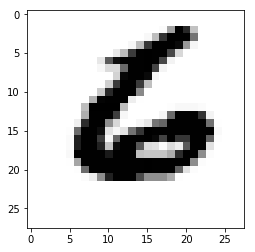

In [57]:
import numpy
import matplotlib.pyplot
%matplotlib inline

#тестирование сети

# оценка сети
scorecard=[]

#для всех записей в списке
for record in test_data_list:
    all_values=record.split(',')
    #правильный ответ
    correct_label=int(all_values[0])
    image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
    matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
    answer=n.query((numpy.asfarray(all_values[1:])/255*0.99)+0.01)
    label=numpy.argmax(answer)
    print("Network answer is: ",label)
    print("Right answer is: ", correct_label)
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass
pass
print(scorecard)
    
    

In [58]:
numpy.argmax(answer)

6

In [59]:
scorecard_array=numpy.asarray(scorecard)
print('network score: ',scorecard_array.sum()/scorecard_array.size)

network score:  0.944


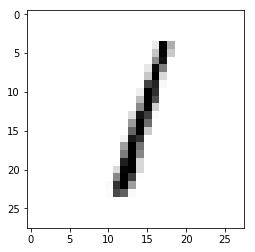

In [60]:
import numpy
import matplotlib.pyplot
%matplotlib inline

all_values = test_data_list[2].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

Network answer is:  8


/Users/igorvozhga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


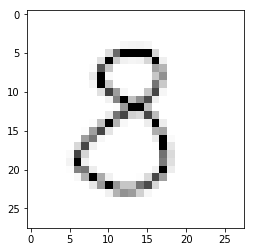

In [64]:
import scipy.misc
#import imageio
image_file_name='/Users/igorvozhga/desktop/neurnet/mytest2.png'
#img_array=imageio.imread(image_file_name, flatten=True)
img_array=scipy.misc.imread(image_file_name, flatten=True)
img_data=255-img_array.reshape(784)
img_data=(img_data/255.0*0.99)+0.01
answer=n.query(numpy.asfarray(img_data))
label=numpy.argmax(answer)

print("Network answer is: ",label)
all_values=img_data
#правильный ответ

image_array = numpy.asfarray(all_values).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
